In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [94]:
df = pd.read_csv('breast-cancer.csv')
df.sample(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
227,88147102,B,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,...,19.31,114.20,808.2,0.1136,0.3627,0.3402,0.13790,0.2954,0.08362,NaN
224,8813129,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,...,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623,NaN
124,865468,B,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,...,22.75,91.99,632.1,0.1025,0.2531,0.3308,0.08978,0.2048,0.07628,NaN
86,86135501,M,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,...,29.25,108.40,808.9,0.1306,0.1976,0.3349,0.12250,0.3020,0.06846,NaN
480,912193,B,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,...,27.87,88.83,547.4,0.1208,0.2279,0.1620,0.05690,0.2406,0.07729,NaN
372,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666,NaN


In [95]:
df.shape

(569, 33)

In [96]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [97]:
df = df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [98]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [99]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [100]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [101]:
df.info

<bound method DataFrame.info of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678 

In [102]:
df['diagnosis'] = df['diagnosis'].map({'M':0 , 'B':1}).astype(int)

In [103]:
df.sample(7)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
430,0,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,...,16.35,27.57,125.40,832.7,0.1419,0.70900,0.9019,0.24750,0.2866,0.11550
487,0,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,...,23.96,30.39,153.90,1740.0,0.1514,0.37250,0.5936,0.20600,0.3266,0.09009
165,1,14.97,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.01939,0.1515,...,15.98,25.82,102.30,782.1,0.1045,0.09995,0.0775,0.05754,0.2646,0.06085
352,0,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.6451,0.27560,0.3690,0.08815
446,0,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,...,21.53,38.54,145.40,1437.0,0.1401,0.37620,0.6399,0.19700,0.2972,0.09075
499,0,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,...,23.86,30.76,163.20,1760.0,0.1464,0.35970,0.5179,0.21130,0.2480,0.08999
278,1,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.1060,0.05185,0.2335,0.06263


In [104]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
len(X_train),len(y_train)

(455, 455)

In [107]:
len(X_test),len(y_test)

(114, 114)

In [108]:
# give the data to the algorithm

from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier(n_neighbors=5)
reg.fit(X_train,y_train)

KNeighborsClassifier()

In [109]:
X_train.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.1750,0.4228,0.1175
181,21.090,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.678,0.2903,0.4098,0.1284


In [110]:
y_train.head()

,diagnosis
68,1
181,0
63,1
248,1
60,1


In [111]:
one  = 0
zero = 0
for i in y_train:
  if i == 1:
    one = one + 1
  else:
    zero = zero + 1
print(one)
print(zero)

286
169


In [112]:
# train performance y
y_train_pred = reg.predict(X_train)
y_train_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [113]:
training_data = pd.DataFrame()
training_data = X_train.copy()
training_data['y_train_values'] = y_train
training_data['y_train_pred_values'] = y_train_pred
training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_train_values,y_train_pred_values
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1,1
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0,0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1,1
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0,1


In [114]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in training_data.index:
  if training_data['y_train_values'][i] == 1 and training_data['y_train_pred_values'][i] == 1:
    tp = tp + 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_values'][i] == 0:
    tn = tn + 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_values'][i] == 1:
    fp = fp + 1
  else:
    fn = fn + 1

print(f'True Positive : {tp}')
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')

True Positive : 281
True Negative : 147
False Positive : 22
False Negative : 5


In [115]:
print(f'Train Accuracy : {(tp+tn) / (tp+tn+fp+fn)}')

Train Accuracy : 0.9406593406593406


In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [117]:
confusion_matrix(y_train,y_train_pred)

array([[147,  22],
       [  5, 281]])

In [118]:
accuracy_score(y_train,y_train_pred)

0.9406593406593406

In [119]:
# test performance
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [120]:
y_test

,diagnosis
204,1
70,0
131,0
431,1
540,1
...,...
486,1
75,0
249,1
238,1


In [121]:
confusion_matrix(y_test,y_test_pred)

array([[38,  5],
       [ 0, 71]])

In [122]:
accuracy_score(y_test,y_test_pred)

0.956140350877193

In [123]:
reg.score(X_test,y_test)

0.956140350877193

In [124]:
# selecting best k_value
k = np.arange(3,101,2)
k

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [125]:
test_acc = []
for j in k:
  reg = KNeighborsClassifier(n_neighbors=j) # k_value 5
  reg.fit(X_train,y_train)
  test_acc.append(reg.score(X_test,y_test))

In [126]:
test_acc

[0.9298245614035088,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9824561403508771,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.94736842105263

In [127]:
test_acc.index(max(test_acc))

4

In [128]:
k[test_acc.index(max(test_acc))]

11

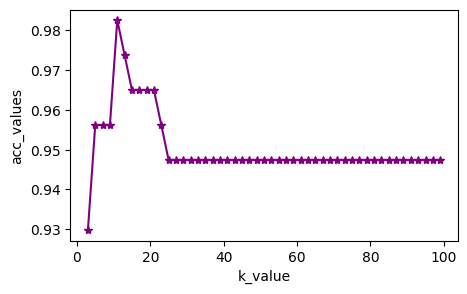

In [129]:
plt.figure(figsize = (5,3))
plt.xlabel('k_value')
plt.ylabel('acc_values')
plt.plot(k,test_acc,color='purple',marker='*')
plt.show()

**code with best K_value**

In [130]:
# give the data to the algorithm
reg = KNeighborsClassifier(n_neighbors=11)
reg.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [131]:
X_train.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.1750,0.4228,0.1175
181,21.090,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.678,0.2903,0.4098,0.1284


In [132]:
y_train.head(2)

,diagnosis
68,1
181,0


In [133]:
one = 0
zero = 0
for i in y_train:
  if i == 1:
    one = one + 1
  else:
    zero = zero + 1
print(one)
print(zero)

286
169


In [134]:
# train performance y
y_train_pred = reg.predict(X_train)
y_train_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [135]:
training_data = pd.DataFrame()
training_data = X_train.copy()
training_data['y_train_values'] = y_train
training_data['y_train_pred_values'] = y_train_pred
training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_train_values,y_train_pred_values
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1,1
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0,0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1,1
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0,0


In [136]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in training_data.index:
  if training_data['y_train_values'][i] == 1 and training_data['y_train_pred_values'][i] == 1:
    tp = tp = 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_values'][i] == 0:
    tn = tn + 1
  elif training_data['y_train_values'][i] == 0 and training_data['y_train_pred_values'][i] == 1:
    fp = fp + 1
  else:
    fn = fn + 1

print(f'True Positive : {tp}')
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')

True Positive : 1
True Negative : 147
False Positive : 22
False Negative : 9


In [137]:
print(f'Train Accuracy : {(tp+tn) / (tp+tn+fp+fn)}')

Train Accuracy : 0.8268156424581006


In [138]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [139]:
confusion_matrix(y_train,y_train_pred)

array([[147,  22],
       [  9, 277]])

In [140]:
accuracy_score(y_train,y_train_pred)

0.9318681318681319

In [141]:
# test performance
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [142]:
y_test

,diagnosis
204,1
70,0
131,0
431,1
540,1
...,...
486,1
75,0
249,1
238,1


In [143]:
confusion_matrix(y_test,y_test_pred)

array([[41,  2],
       [ 0, 71]])

In [144]:
accuracy_score(y_test,y_test_pred)

0.9824561403508771

In [145]:
reg.score(X_test,y_test)

0.9824561403508771

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [147]:
X_train.shape

(455, 30)

In [148]:
test_point = np.random.rand(5,6).ravel()
test_point

array([0.65774189, 0.93893972, 0.13262978, 0.09992592, 0.09264014,
       0.11905483, 0.54556096, 0.07645347, 0.68633428, 0.52426284,
       0.33102616, 0.7964681 , 0.16661009, 0.35286164, 0.06953503,
       0.3749457 , 0.57911833, 0.60176626, 0.57152478, 0.88169884,
       0.271937  , 0.71963714, 0.53850028, 0.68978861, 0.87183636,
       0.2395381 , 0.51789379, 0.20301832, 0.66061203, 0.76539811])

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
if reg.predict([test_point])[0] == 0:
  print(f'M')
else:
  print(f'B')

B
